# Set up Environment

In [156]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%load_ext autoreload
%autoreload 2

# Import functions in scripts
import os
import sys
module_path = os.path.abspath(os.path.join('../scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
from proj1_helpers import *
from implementations import *
np.set_printoptions(suppress=True)
from sklearn import linear_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [157]:
targets, traindata, ids = load_csv_data("../data/train.csv",False)
nr_traindata, nr_columns = traindata.shape
print(traindata.shape)

(250000, 30)


In [121]:
with open('../data/train.csv', newline='') as f:
    reader = csv.reader(f)
    headers = next(reader)
headers = np.array(headers[2:])   

['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']


In [122]:
mask0 = [4, 5, 6, 12, 23, 24, 25, 26, 27, 28]
mask_no_jets = np.ones(len(headers), dtype=bool)
mask_no_jets[mask0] = False
traindata = traindata[:, mask_no_jets]
headers = headers[mask_no_jets]

In [158]:
insert_median_for_nan(traindata)

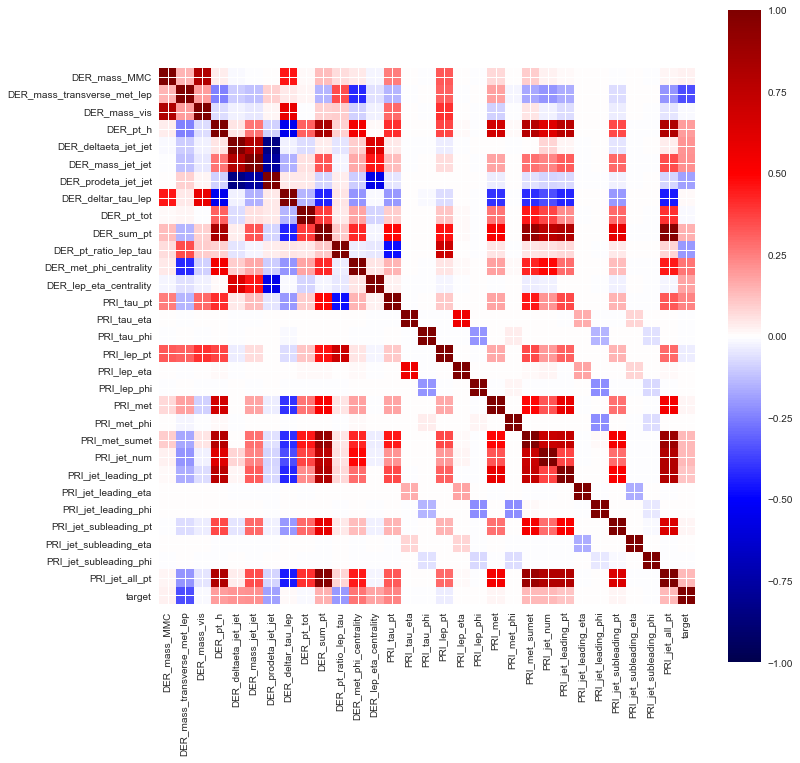

In [16]:
correlation = np.corrcoef(np.c_[traindata, targets], rowvar = False)
plot_corr_matrix(correlation, np.append(headers,'target'))

In [ ]:
for ind, corr in enumerate(correlation):
    t = np.sort(corr)
    print(t[:2], t[ -2:])

In [11]:
def plot_hists(targets, traindata, headers):
    sns.distplot(targets)

    for i, header in enumerate(headers):
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.20, .80)}, figsize=(10,6))

        sns.boxplot(traindata[:,i], ax=ax_box)
        sns.distplot(traindata[:,i], ax=ax_hist, label= header)

        ax_box.set(yticks=[])
        ax_hist.set(xlabel=header)
        sns.despine(ax=ax_hist)
        sns.despine(ax=ax_box, left=True)

# Preprocess Data

In [184]:
targets[targets == -1] = 0

# Train Model

In [ ]:
weights = np.random.random(features.shape[1])

In [ ]:
weights_ridge = ridge_regression(targets, features, lambda_ = 0.002)

In [97]:
def cross_validation_demo(x,y, degree):
    seed = 54
    #degree = 3
    k_fold = 4
    lambdas = np.logspace(-3, 1, 2)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = np.zeros(len(lambdas))
    rmse_te = np.zeros(len(lambdas))
    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for ind, lambda_ in enumerate(lambdas): 
        print(ind, lambda_)
        rmse_tr[ind], rmse_te[ind] = cross_validation(y, x, k_indices, k_fold, lambda_, degree, "logistic",
                                                      1000000, gamma = 0.000001)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

0 0.001
SGD(0/999999): loss=129964.16367400049, norm of weights=3.616497663375439e-10, gamma=1e-05
SGD(50000/999999): loss=117253.91883563258, norm of weights=0.03288387028214604, gamma=1e-05
SGD(100000/999999): loss=111517.95162987814, norm of weights=0.09033398501029605, gamma=1e-05
SGD(150000/999999): loss=107901.9186015222, norm of weights=0.15548985169402063, gamma=1e-05
SGD(200000/999999): loss=105338.71046678953, norm of weights=0.22346491908301075, gamma=1e-05
SGD(250000/999999): loss=103408.62139351798, norm of weights=0.2914078157773794, gamma=1e-05
SGD(300000/999999): loss=101901.7074031119, norm of weights=0.3595379751889517, gamma=1e-05
SGD(350000/999999): loss=100708.79773095388, norm of weights=0.4228821965197473, gamma=1e-05
SGD(400000/999999): loss=99697.55382398158, norm of weights=0.48854288152950215, gamma=1e-05
SGD(450000/999999): loss=98894.82261508252, norm of weights=0.5484196363245275, gamma=1e-05
SGD(500000/999999): loss=98164.99832788168, norm of weights=0.61

/home/adam/EPFL_courses/Machine_Learning-2017/HiggsBosonDetection/scripts/implementations.py:256: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log(1 + np.exp(tx.dot(w))) - y * tx.dot(w))


SGD(100000/999999): loss=inf, norm of weights=327556.5353066652, gamma=1e-05
SGD(150000/999999): loss=inf, norm of weights=7210856297.831177, gamma=1e-05
SGD(200000/999999): loss=inf, norm of weights=158750220846351.5, gamma=1e-05
SGD(250000/999999): loss=inf, norm of weights=3.49495850006903e+18, gamma=1e-05
SGD(300000/999999): loss=inf, norm of weights=7.694310524831298e+22, gamma=1e-05
SGD(350000/999999): loss=inf, norm of weights=1.693937551833152e+27, gamma=1e-05
SGD(400000/999999): loss=inf, norm of weights=3.7292807721374717e+31, gamma=1e-05
SGD(450000/999999): loss=inf, norm of weights=8.210181693170337e+35, gamma=1e-05
SGD(500000/999999): loss=inf, norm of weights=1.8075089421661966e+40, gamma=1e-05
SGD(550000/999999): loss=inf, norm of weights=3.979313367362545e+44, gamma=1e-05
SGD(600000/999999): loss=inf, norm of weights=8.760639854258738e+48, gamma=1e-05
SGD(650000/999999): loss=inf, norm of weights=1.928694816686288e+53, gamma=1e-05
SGD(700000/999999): loss=inf, norm of w

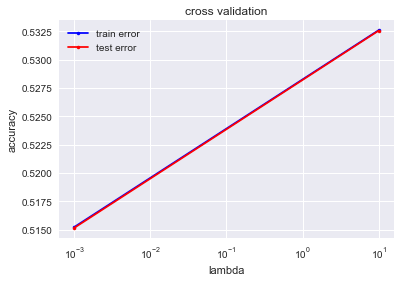

In [108]:
for i in range(2,3):
    cross_validation_demo(traindata, targets, i)

In [179]:
#traindata1,_,_ = normalize(traindata)
reg_logistic_regression(targets, traindata[:,1:5], 0.01, np.zeros(4), 600, 0.01)

SGD(0/599): loss=172706.82144942813, norm of weights=[-0.00020214 -0.00000342  0.00001844  0.00161725], gamma=0.01
SGD(50/599): loss=153639.80721274635, norm of weights=[-0.00865811 -0.00009672  0.00072371  0.07121625], gamma=0.01
SGD(100/599): loss=145175.55757063825, norm of weights=[-0.01498104 -0.00009467  0.0011386   0.12615843], gamma=0.01
SGD(150/599): loss=141427.98108281, norm of weights=[-0.01963281 -0.00006556  0.00139537  0.16735283], gamma=0.01
SGD(200/599): loss=139833.7573542154, norm of weights=[-0.02290536 -0.00003342  0.00155754  0.19641528], gamma=0.01
SGD(250/599): loss=139183.65311795552, norm of weights=[-0.02510931 -0.00000679  0.00165985  0.21594641], gamma=0.01
SGD(300/599): loss=138927.6567928968, norm of weights=[-0.02654235  0.00001258  0.00172382  0.22860944], gamma=0.01
SGD(350/599): loss=138829.39940804668, norm of weights=[-0.02745076  0.00002567  0.00176344  0.23661747], gamma=0.01
SGD(400/599): loss=138792.33783445886, norm of weights=[-0.02801677  0.0

(array([-0.02878667,  0.00004604,  0.00182048,  0.2483633 ]),
 138770.82712703737)

In [123]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(traindata, targets)
logistic.score(traindata, targets)

0.73936000000000002

# Evaluate Training Error

In [180]:
w = np.array([-0.02878667,  0.00004604,  0.00182048,  0.2483633 ])

In [183]:
accuracy(w,traindata[:,1:5],targets,nr_traindata,"logistic")

0.49989399999999995

In [ ]:
train_predictions = predict_labels(weights_ridge, features)

In [ ]:
plt.hist(train_predictions)

As the evaluation metric, we use simple classification accuracy (percentage of correct predictions). 

In [ ]:
# Good predictions after multiplication will have positive value
measure = train_predictions*targets
num_of_good_predictions = measure[measure > 0].sum()
accuracy = num_of_good_predictions/nr_traindata
print(accuracy)

# Create Submission File

In [ ]:
test_targets, test_data, test_ids = load_csv_data("../data/test.csv",False)
nr_testdata, nr_testcolumns = test_data.shape
test_features = white_cubic_features(test_data,nr_testcolumns,nr_testdata)
test_predictions = predict_labels(weights, test_features)
create_csv_submission(test_ids, test_predictions, "Kozak_Nurmi_Tsai")

In [21]:
w = np.array([ -8.87562088e-01,   1.06654868e-01,  -6.72385263e-01 , -1.13453481e+00,
     4.46857111e-01,  -4.90857063e-02 ,  2.95384420e-01 , -3.21894147e-02,
   1.06046782e+00 , -9.24772499e-02 ,  8.97044902e-02 , -7.96292081e-01,
   2.49222247e-01,  -1.11625972e-01 ,  4.69365115e-01 , -1.89308044e-03,
  -3.16228017e-03 ,  1.00714748e+00 ,  4.03986404e-04 ,  7.52715781e-03,
   9.45045549e-02 , -3.11411499e-03 , -1.31674124e-01 , -7.21375919e-02,
  -2.10479529e-01 , -1.84548255e-03 , -5.56399287e-04  ,-7.56200706e-02,
   6.62353462e-03 , -3.27171861e-03 , -1.40637280e-01 ,  4.36614867e-02,
   1.54688675e-01 ,  4.50083368e-02,   3.56841865e-01])

In [56]:
targets, traindata, ids = load_csv_data("/home/adam/Downloads/final_version/Untitled Folder/train_sel.csv",False)

In [59]:
traindata,_,_ = standardize2(traindata)

In [60]:
measure = predict_labels_lg(w, traindata)*targets
num_of_good_predictions = measure[measure == 1].sum()
accuracy = num_of_good_predictions/250000
print(accuracy)

0.75298
